In [10]:
#importing all python packages such as LSTM, CONv2D for CNN and BI-LSTM for extension
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [74]:
#defining function to calculate MAPE
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [75]:
#defining function to get LOSS values
def getModelLoss(model_name):
    f = open(model_name, 'rb')
    data = pickle.load(f)
    f.close()
    accuracy = data['val_accuracy']
    loss = data['val_loss']
    return accuracy, loss    

In [76]:
#reading and displaying dataset values
dataset = pd.read_csv("Dataset/LearningData.csv")
dataset.fillna(0, inplace = True) #removing missing values
labels, count = np.unique(dataset['Class'], return_counts=True)
dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,Online Learning,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,Online Learning,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,Online Learning,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,Online Learning,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,Online Learning,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


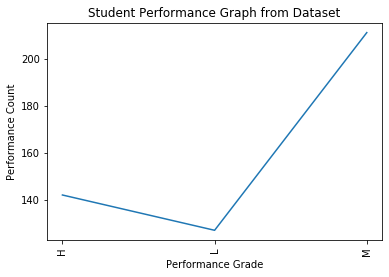

In [77]:
#plotting graph with number of student performance as Low, High and Medium 
plt.plot(labels, count)
plt.xlabel('Performance Grade')
plt.ylabel('Performance Count')
plt.xticks(rotation=90)
plt.title("Student Performance Graph from Dataset")
plt.show()

In [78]:
#dataset preprocessing converting all non-numeric data into numeric and then shuffling the dataset
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #encode all non-numeric data to numeric data
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))
        label_encoder.append(le)
        
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]-1]#extract X and Y features from dataset
Y = dataset[:,dataset.shape[1]-1]
Y = to_categorical(Y)
scaler = StandardScaler()
X = scaler.fit_transform(X) #normalized the dataset
print("Dataset Preprocessing Completed & below is the normalized dataset")
print(X)

Dataset Preprocessing Completed & below is the normalized dataset
[[ 0.7574764  -0.1402013  -0.15155299 ...  0.8819171   0.80239368
   0.81295735]
 [ 0.7574764  -0.1402013  -0.15155299 ...  0.8819171   0.80239368
   0.81295735]
 [ 0.7574764  -0.1402013  -0.15155299 ... -1.13389342 -1.24627103
  -1.23007683]
 ...
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
   0.81295735]
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
  -1.23007683]
 [-1.32017315 -0.54560266 -0.53241913 ... -1.13389342 -1.24627103
  -1.23007683]]


In [79]:
#now split dataset into train and test 
X1 = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2)
print()
print("Total records found in dataset : "+str(X.shape[0]))
print("Total features found in dataset: "+str(X.shape[1]))
print("80% training records : "+str(X_train.shape[0]))
print("20% testing records  : "+str(X_test.shape[0]))


Total records found in dataset : 480
Total features found in dataset: 16
80% training records : 384
20% testing records  : 96


In [80]:
#defining global features to store accuracy and other values
accuracy = []
precision = []
recall = [] 
fscore = []

In [81]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(12, 6))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_tpr, ns_fpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

CNN Accuracy  : 94.79166666666666
CNN Precision : 94.51659451659452
CNN Recall    : 95.47892720306513
CNN FSCORE    : 94.92367949673893


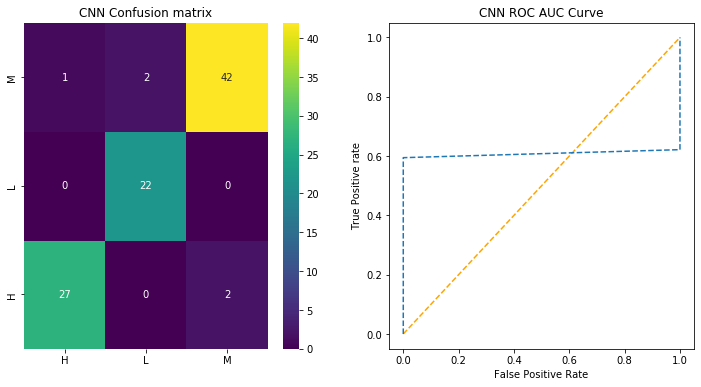

In [82]:
#now training CNN with 80% training dataset and then test on 20% dataset
cnn = Sequential()
#defining CNN layers with CONv2D, Maxpool, Dense and dropout
cnn.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
#creating CNN layer with 25 neurons of 5 X 5 dimension to filtered or optimized fetaures 25 times
cnn.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2), padding='same'))
cnn.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2), padding='same'))
#normalizing selected features
cnn.add(BatchNormalization())
cnn.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
cnn.add(MaxPool2D(pool_size=(1, 1), padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Flatten())
#defining output layer
cnn.add(Dense(units=100, activation='relu'))
cnn.add(Dense(units=100, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(units=y_train.shape[1], activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    hist = cnn.fit(X_train, y_train, batch_size = 8, epochs = 50, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    cnn.load_weights("model/cnn_weights.hdf5")
predict = cnn.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)    
calculateMetrics("CNN", y_test1, predict)

CNN Integrated LSTM Accuracy  : 90.625
CNN Integrated LSTM Precision : 90.9544618764477
CNN Integrated LSTM Recall    : 90.26384243775549
CNN Integrated LSTM FSCORE    : 90.5395750086004


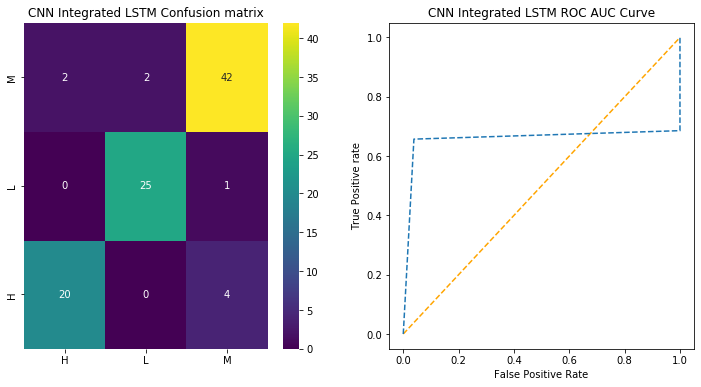

In [84]:
#now extracting features from CNN to train with LSTM
cnn_model = Model(cnn.inputs, cnn.layers[-5].output)#creating cnn model
cnn_features = cnn_model.predict(X1)  #extracting cnn features from test data
cnn_features = np.reshape(cnn_features, (cnn_features.shape[0], 10 ,7))
X_train, X_test, y_train, y_test = train_test_split(cnn_features, Y, test_size=0.2)
lstm_model = Sequential()#defining deep learning sequential object
#adding LSTM layer with 100 filters to filter given input X train data to select relevant features
lstm_model.add(LSTM(100,input_shape=(X_train.shape[1], X_train.shape[2])))
#adding dropout layer to remove irrelevant features
lstm_model.add(Dropout(0.2))
#adding another layer
lstm_model.add(Dense(100, activation='relu'))
#defining output layer for prediction
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))
#compile LSTM model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if os.path.exists("model/lstm_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/lstm_weights.hdf5', verbose = 1, save_best_only = True)
    hist = lstm_model.fit(X_train, y_train, batch_size = 8, epochs = 50, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/lstm_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    lstm_model.load_weights("model/lstm_weights.hdf5")
predict = lstm_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)    
calculateMetrics("CNN Integrated LSTM", y_test1, predict)    

CNN Integrated Bidirectional-LSTM Accuracy  : 97.91666666666666
CNN Integrated Bidirectional-LSTM Precision : 97.43589743589745
CNN Integrated Bidirectional-LSTM Recall    : 97.9933110367893
CNN Integrated Bidirectional-LSTM FSCORE    : 97.64677152912448


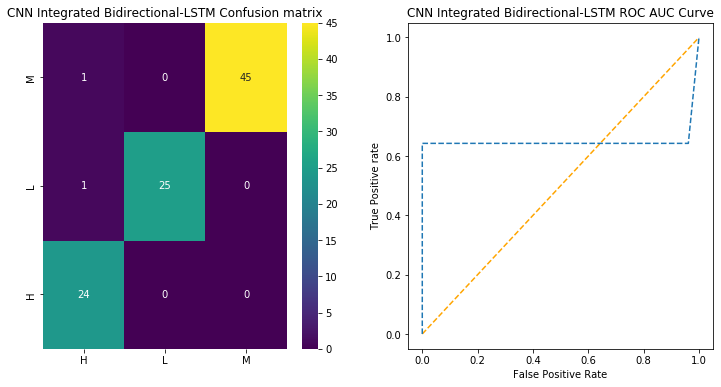

In [85]:
#now we are enhancing LSTM with advance Bidirectional LSTM to filetred dataset accurately
#and can give accuracy between 95 to 100%. This model will get integrated with CNN by extracting features from CNN
#and then retraining with BI-LSTM. BI-LSTM will get trained in optimized features from CNN so its performnace will be best.
#Its like we are retraining Experienced person and this experienced retrained person will work more accuratley 
bilstm = Sequential()#defining deep learning sequential object
#adding bi-directional LSTM layer with 32 filters to filter given input X train data to select relevant features
bilstm.add(Bidirectional(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
#adding dropout layer to remove irrelevant features
bilstm.add(Dropout(0.2))
#adding another layer
bilstm.add(Bidirectional(LSTM(32)))
bilstm.add(Dropout(0.2))
#defining output layer for prediction
bilstm.add(Dense(y_train.shape[1], activation='softmax'))
#compile BI-LSTM model
bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if os.path.exists("model/bilstm_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/bilstm_weights.hdf5', verbose = 1, save_best_only = True)
    hist = bilstm.fit(X_train, y_train, batch_size = 8, epochs = 50, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/bilstm_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    
else:
    bilstm = load_model("model/bilstm_weights.hdf5")
predict = bilstm.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)    
calculateMetrics("CNN Integrated Bidirectional-LSTM", y_test1, predict)   

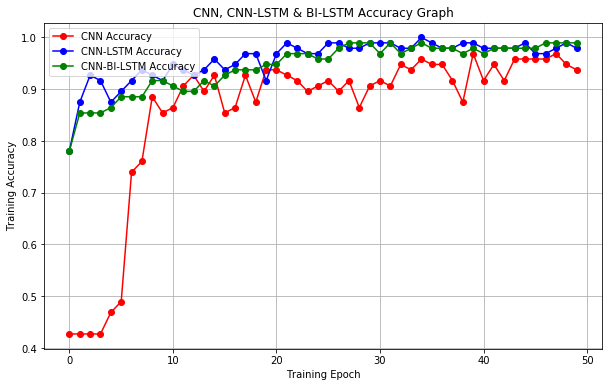

In [87]:
#now plot CNN, CNN-LSTM & Extension CNN-Bidirectional-LSTM training accuracy graph
cnn_acc, cnn_loss = getModelLoss("model/cnn_history.pckl")
lstm_acc, lstm_loss = getModelLoss("model/lstm_history.pckl")
bilstm_acc, bilstm_loss = getModelLoss("model/bilstm_history.pckl")

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Training Epoch')
plt.ylabel('Training Accuracy')
plt.plot(cnn_acc, 'ro-', color = 'red')
plt.plot(lstm_acc, 'ro-', color = 'blue')
plt.plot(bilstm_acc, 'ro-', color = 'green')
plt.legend(['CNN Accuracy', 'CNN-LSTM Accuracy','CNN-BI-LSTM Accuracy'], loc='upper left')
plt.title('CNN, CNN-LSTM & BI-LSTM Accuracy Graph')
plt.show()

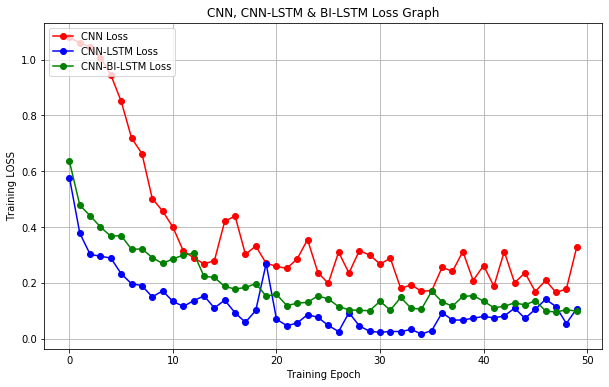

In [88]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Training Epoch')
plt.ylabel('Training LOSS')
plt.plot(cnn_loss, 'ro-', color = 'red')
plt.plot(lstm_loss, 'ro-', color = 'blue')
plt.plot(bilstm_loss, 'ro-', color = 'green')
plt.legend(['CNN Loss', 'CNN-LSTM Loss','CNN-BI-LSTM Loss'], loc='upper left')
plt.title('CNN, CNN-LSTM & BI-LSTM Loss Graph')
plt.show()

In [91]:
#Performance of all algorithms in tabular format
columns = ["Algorithm Name","Accuracy", "Precision", "Recall", "FSCORE"]
values = []
algorithm_names = ["CNN", "Propose CNN-LSTM", "Extension CNN-BI-LSTM"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],accuracy[i],precision[i],recall[i],fscore[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,CNN,94.791667,94.516595,95.478927,94.923679
1,Propose CNN-LSTM,90.625000,90.954462,90.263842,90.539575
2,Extension CNN-BI-LSTM,97.916667,97.435897,97.993311,97.646772


In [92]:
#Predict student performance on test data
#reading test data
dataset = pd.read_csv("Dataset/test_dataset.txt")
dataset.fillna(0, inplace = True)
temp = dataset.values
columns = dataset.columns
types = dataset.dtypes.values
index = 0
for i in range(len(types)):
    name = types[i]
    if name == 'object': #encode all non-numeric data to numeric data
        dataset[columns[i]] = pd.Series(label_encoder[index].transform(dataset[columns[i]].astype(str)))
        index = index + 1
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]]
X = scaler.transform(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))
#using cnn extracting features from test data
cnn_features = cnn_model.predict(X) 
cnn_features = np.reshape(cnn_features, (cnn_features.shape[0], 10 ,7))
predict = bilstm.predict(cnn_features)
predict = np.argmax(predict, axis=1)
for i in range(len(predict)):
    print("Student Test Data "+str(temp[i])+" Predicted Performance ====> "+labels[predict[i]]+"\n")

Student Test Data ['M' 'KW' 'KuwaIT' 'lowerlevel' 'G-05' 'A' 'English' 'F' 'Father' 7 10 1
 30 'No' 'Bad' 'Above-7'] Predicted Performance ====> L

Student Test Data ['F' 'KW' 'KuwaIT' 'HighSchool' 'G-12' 'A' 'English' 'F' 'Mum' 70 4 39 90
 'Yes' 'Good' 'Under-7'] Predicted Performance ====> H

Student Test Data ['F' 'KW' 'KuwaIT' 'HighSchool' 'G-12' 'A' 'English' 'F' 'Mum' 13 80 40 88
 'Yes' 'Good' 'Under-7'] Predicted Performance ====> H

Student Test Data ['M' 'KW' 'KuwaIT' 'HighSchool' 'G-09' 'A' 'IT' 'F' 'Father' 20 80 33 33
 'Yes' 'Good' 'Under-7'] Predicted Performance ====> M

Student Test Data ['M' 'KW' 'KuwaIT' 'HighSchool' 'G-11' 'A' 'Quran' 'F' 'Father' 13 3 11 9
 'No' 'Bad' 'Above-7'] Predicted Performance ====> L

Student Test Data ['F' 'lebanon' 'lebanon' 'MiddleSchool' 'G-07' 'B' 'Math' 'F' 'Mum' 80 90
 49 55 'Yes' 'Bad' 'Under-7'] Predicted Performance ====> H

